In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Q1 - Are Projects *Actually* Delayed?

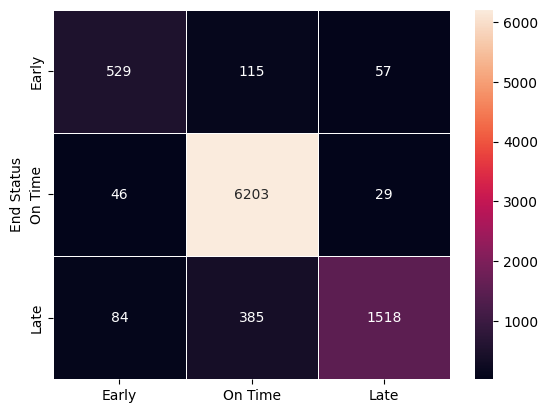

In [2]:
deltasHeatMapDF = pd.read_csv('data/deltasHeatMapDF.csv',index_col=0)

sns.heatmap(deltasHeatMapDF,
            annot=True,
            fmt="d",
            linewidths=.5);

## Another Plot?
-> get percentages  
-> make a table ?  
-> sns.pairplot?  
-> correlation heatmap (data = dataset.corr())

# Q2 - Budget Things

### Budget Status by Borough

<AxesSubplot: xlabel='costStatus', ylabel='count'>

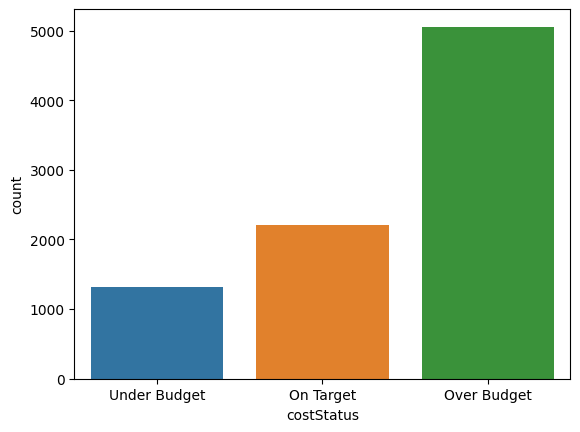

In [7]:
projectCosts = pd.read_csv('data/projectCosts.csv',index_col=0)

# make a bar plot of the number of projects that were over budget, on budget, and under budget
sns.countplot(x="costStatus",
              data=projectCosts,
              order=["Under Budget","On Target","Over Budget"])


In [13]:
# make a bar plot that shows the number of projects that were over/under budget by boro
# sns.countplot(x="boro", hue="costStatus", data=projectCosts);

import plotly_express as px





"""Make it customizable by boro"""
borough = 'BROOKLYN'

filteredBoro = projectCosts[projectCosts['boro'] == borough]
# sns.countplot(x="costStatus", data=filteredBoro, order=["Under Budget","On Target","Over Budget"])

fig = px.bar(filteredBoro,
             x='boro',
             color='costStatus',
             barmode='group',
             category_orders={'costStatus': ["Under Budget","On Target","Over Budget"]},
             title='Count of Cost Status Across Boroughs'
            )

fig.update_layout(
    xaxis=dict(title='Borough'),
    yaxis=dict(title='Count'),
    legend_title='Cost Status'
)

fig.show()

### Budget Status by Project Finish Status

In [ ]:
costStatusHeatMapDF = pd.read_csv('data/costStatusHeatMapDF.csv',index_col=0)

sns.heatmap(costStatusHeatMapDF,
            annot=True,
            fmt="d",
            linewidths=.5);

### Budget Deltas by Agencies

In [ ]:
# what is the average cost delta for projects by managing agnecy?
agencyBudgets = projectCosts.groupby('managing_agcy')[['managing_agcy','cost_delta']] \
    .agg({ 'cost_delta': 'mean'}) \
    .astype({'cost_delta': 'int64'}) \
    .sort_values('cost_delta', ascending=False).reset_index()

In [ ]:
# plot the top 5 agencies with the highest average cost delta
sns.barplot(y="managing_agcy",
            x="cost_delta",
            data=agencyBudgets.head(),
            order=agencyBudgets['managing_agcy'].head())

In [ ]:
sns.barplot(y="managing_agcy",
            x="cost_delta",
            data=agencyBudgets.tail(),
            order=agencyBudgets['managing_agcy'].tail())

### Who paid more for late projects?

In [ ]:
# There are some projects with an initial budget of $0 Let's filter those out
cleanProjectCosts = projectCosts[projectCosts['orig_bud_amt'] != 0]